In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
weather = pd.read_csv("C:/Users/MUZAM/Downloads/weatherdata.csv", index_col="Date")

In [54]:
weather

,TAVG,TMAX,TMIN,PRCP
Date,,,,
01-01-1980,75,NaN,68.0,0.00
02-01-1980,74,84.0,66.0,0.00
03-01-1980,76,84.0,66.0,0.00
04-01-1980,76,86.0,68.0,0.00
05-01-1980,77,84.0,70.0,0.00
...,...,...,...,...
28-06-2023,90,NaN,82.0,NaN
29-06-2023,88,99.0,NaN,NaN
30-06-2023,89,100.0,80.0,0.04


In [55]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

TAVG     0.000000
TMAX     0.155445
TMIN     0.271981
PRCP     0.368747
dtype: float64

In [56]:
weather.isnull().sum()

TAVG        0
TMAX     2461
TMIN     4306
PRCP     5838
dtype: int64

In [57]:
weather.columns = weather.columns.str.lower()

In [58]:
weather

,tavg,tmax,tmin,prcp
Date,,,,
01-01-1980,75,NaN,68.0,0.00
02-01-1980,74,84.0,66.0,0.00
03-01-1980,76,84.0,66.0,0.00
04-01-1980,76,86.0,68.0,0.00
05-01-1980,77,84.0,70.0,0.00
...,...,...,...,...
28-06-2023,90,NaN,82.0,NaN
29-06-2023,88,99.0,NaN,NaN
30-06-2023,89,100.0,80.0,0.04


In [59]:
weather = weather.ffill()

In [60]:
weather.apply(pd.isnull).sum()

tavg     0
tmax     1
tmin     0
prcp     0
dtype: int64

In [61]:
weather.dtypes

tavg       int64
tmax     float64
tmin     float64
prcp     float64
dtype: object

In [62]:
weather.index

Index(['01-01-1980', '02-01-1980', '03-01-1980', '04-01-1980', '05-01-1980',
       '06-01-1980', '07-01-1980', '08-01-1980', '09-01-1980', '10-01-1980',
       ...
       '23-06-2023', '24-06-2023', '25-06-2023', '26-06-2023', '27-06-2023',
       '28-06-2023', '29-06-2023', '30-06-2023', '01-07-2023', '02-07-2023'],
      dtype='object', name='Date', length=15832)

In [63]:
    weather.index = pd.to_datetime(weather.index)
    weather.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26',
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-01-07', '2023-02-07'],
              dtype='datetime64[ns]', name='Date', length=15832, freq=None)

In [64]:
weather.index.year
weather.index.year.value_counts().sort_index()

1980    366
1981    365
1982    361
1983    363
1984    363
1985    365
1986    363
1987    363
1988    360
1989    357
1990    357
1991    364
1992    360
1993    364
1994    361
1995    363
1996    365
1997    365
1998    364
1999    364
2000    366
2001    365
2002    364
2003    364
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    183
Name: Date, dtype: int64

In [65]:
weather

,tavg,tmax,tmin,prcp
Date,,,,
1980-01-01,75,NaN,68.0,0.00
1980-02-01,74,84.0,66.0,0.00
1980-03-01,76,84.0,66.0,0.00
1980-04-01,76,86.0,68.0,0.00
1980-05-01,77,84.0,70.0,0.00
...,...,...,...,...
2023-06-28,90,96.0,82.0,0.00
2023-06-29,88,99.0,82.0,0.00
2023-06-30,89,100.0,80.0,0.04


In [66]:
weather["target"]=weather.shift(-1)["tmax "]

In [67]:
weather

,tavg,tmax,tmin,prcp,target
Date,,,,,
1980-01-01,75,NaN,68.0,0.00,84.0
1980-02-01,74,84.0,66.0,0.00,84.0
1980-03-01,76,84.0,66.0,0.00,86.0
1980-04-01,76,86.0,68.0,0.00,84.0
1980-05-01,77,84.0,70.0,0.00,84.0
...,...,...,...,...,...
2023-06-28,90,96.0,82.0,0.00,99.0
2023-06-29,88,99.0,82.0,0.00,100.0
2023-06-30,89,100.0,80.0,0.04,100.0


In [68]:
weather = weather.fillna(weather.mean())

In [69]:
weather

,tavg,tmax,tmin,prcp,target
Date,,,,,
1980-01-01,75,92.700335,68.0,0.00,84.000000
1980-02-01,74,84.000000,66.0,0.00,84.000000
1980-03-01,76,84.000000,66.0,0.00,86.000000
1980-04-01,76,86.000000,68.0,0.00,84.000000
1980-05-01,77,84.000000,70.0,0.00,84.000000
...,...,...,...,...,...
2023-06-28,90,96.000000,82.0,0.00,99.000000
2023-06-29,88,99.000000,82.0,0.00,100.000000
2023-06-30,89,100.000000,80.0,0.04,100.000000


In [70]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [71]:
predictors = weather.columns[~weather.columns.isin(["target"] ) ]

In [72]:
predictors

Index(['tavg', 'tmax ', 'tmin', 'prcp '], dtype='object')

In [73]:
weather.dtypes

tavg        int64
tmax      float64
tmin      float64
prcp      float64
target    float64
dtype: object

In [74]:
weather["tmax "].unique

<bound method Series.unique of Date
1980-01-01     92.700335
1980-02-01     84.000000
1980-03-01     84.000000
1980-04-01     86.000000
1980-05-01     84.000000
                 ...    
2023-06-28     96.000000
2023-06-29     99.000000
2023-06-30    100.000000
2023-01-07    100.000000
2023-02-07     98.000000
Name: tmax , Length: 15832, dtype: float64>

In [75]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [76]:
predictions = backtest(weather, rr, predictors)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.6113665009630331

In [80]:
r2 = rr.score(weather[predictors], weather["target"])
print("R-squared:", r2)

R-squared: 0.8551586339865116


In [81]:
pd.Series(rr.coef_, index=predictors)

tavg     0.400861
tmax     0.658355
tmin    -0.027217
prcp     0.057159
dtype: float64

In [82]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
1996-12-06,78.0,98.355897,20.355897
2000-02-23,75.0,90.334523,15.334523
2016-05-21,103.0,88.215964,14.784036
1998-05-17,104.0,90.167209,13.832791
2005-06-20,88.0,101.520172,13.520172
...,...,...,...
2010-05-21,98.0,98.001880,0.001880
1993-06-02,85.0,84.998168,0.001832
2009-01-21,86.0,85.998215,0.001785


In [83]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax ", "tmin", "prcp "]:
        weather = compute_rolling(weather, horizon, col)

In [84]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax ", "tmin", "prcp "]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [85]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
predictors = weather.columns[~weather.columns.isin(["target"])]

In [87]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.5857761720971968

In [88]:
mean_squared_error(predictions["actual"], predictions["prediction"])

5.128783393422138

In [89]:
r2 = rr.score(weather[predictors], weather["target"])
print("R-squared:", r2)

R-squared: 0.8628914441758369


In [38]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
Date,,,
1996-12-06,78.0,97.913287,19.913287
2000-02-23,75.0,89.870851,14.870851
1992-10-11,101.0,86.630040,14.369960
2007-06-20,79.0,93.318791,14.318791
1994-05-25,88.0,102.213857,14.213857
...,...,...,...
2023-06-02,89.0,89.001169,0.001169
1990-03-31,93.0,92.998998,0.001002
1995-09-14,94.0,93.999426,0.000574


In [39]:
weather.loc["1990-03-07": "1990-03-17"]

,tavg,tmax,tmin,prcp,target,rolling_3_tmax,rolling_3_tmax _pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp _pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
Date,,,,,,,,,,,,,,,,,,,,,
1990-03-13,84,94.0,76.0,0.00,95.0,90.333333,0.040590,75.333333,0.008850,0.000000,...,76.714286,-0.009311,0.000000,0.000000,92.591640,90.000000,75.562701,74.181818,0.034791,0.035455
1990-03-14,85,95.0,79.0,0.00,94.0,93.000000,0.021505,77.000000,0.025974,0.000000,...,76.857143,0.027881,0.000000,0.000000,92.599359,91.545455,75.573718,75.090909,0.034679,0.000000
1990-03-15,85,94.0,78.0,0.00,94.0,94.333333,-0.003534,77.666667,0.004292,0.000000,...,77.071429,0.012048,0.000000,0.000000,92.603834,92.000000,75.581470,74.545455,0.034569,0.035455
1990-03-16,83,94.0,78.0,0.00,90.0,94.333333,-0.003534,78.333333,-0.004255,0.000000,...,77.285714,0.009242,0.000000,0.000000,92.608280,92.909091,75.589172,74.272727,0.034459,0.000000
1990-03-17,83,90.0,75.0,0.00,90.0,92.666667,-0.028777,77.000000,-0.025974,0.000000,...,77.214286,-0.028677,0.000000,0.000000,92.600000,92.636364,75.587302,74.545455,0.034349,0.000000
1990-03-07,86,99.0,74.0,0.00,99.0,98.000000,0.010204,78.666667,-0.059322,0.000000,...,80.285714,-0.078292,0.020000,-1.000000,92.714715,98.363636,75.576577,79.272727,0.033333,0.023636
1990-03-08,85,97.0,76.0,0.00,94.0,97.000000,0.000000,76.333333,-0.004367,0.016667,...,77.500000,-0.019355,0.020000,-1.000000,92.727545,96.636364,75.577844,77.636364,0.033234,0.143636
1990-03-09,84,96.0,78.0,0.39,98.0,96.666667,-0.006897,79.333333,-0.016807,0.143333,...,79.357143,-0.017102,0.125714,2.102273,92.737313,94.400000,75.585075,77.400000,0.034299,0.048000
1990-03-10,85,93.0,78.0,0.12,91.0,90.333333,0.029520,78.333333,-0.004255,0.046667,...,75.571429,0.032136,0.237857,-0.495495,92.738095,92.181818,75.592262,77.090909,0.034554,0.010909


<AxesSubplot:>

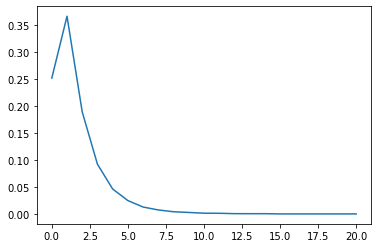

In [40]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [41]:
predictions

,actual,prediction,diff
Date,,,
1990-08-02,87.000000,86.647802,0.352198
1990-09-02,88.000000,86.982361,1.017639
1990-10-02,88.000000,87.757966,0.242034
1990-11-02,88.000000,87.750713,0.249287
1990-12-02,88.000000,87.823429,0.176571
...,...,...,...
2023-06-28,99.000000,97.244467,1.755533
2023-06-29,100.000000,98.205971,1.794029
2023-06-30,100.000000,99.124631,0.875369


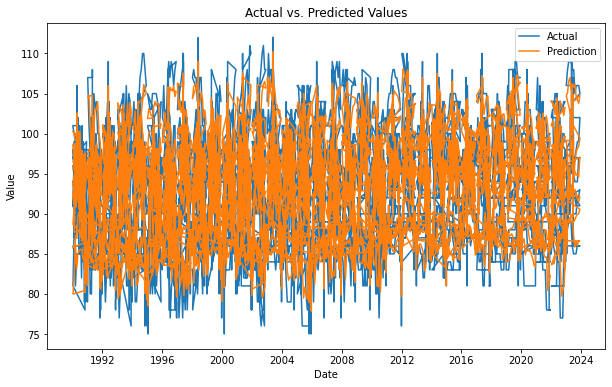

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(predictions.index, predictions["actual"], label="Actual")
plt.plot(predictions.index, predictions["prediction"], label="Prediction")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


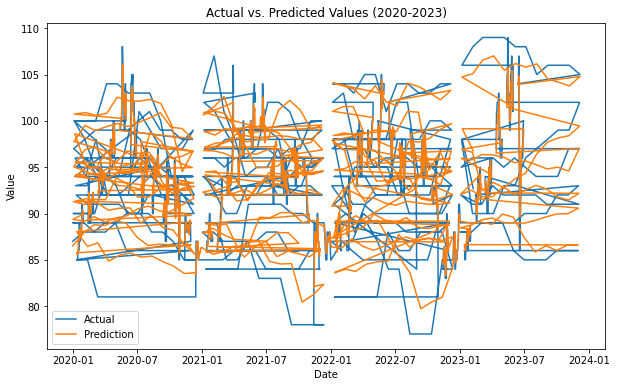

In [43]:
start_date = '2020-01-01'
end_date = '2023-12-31'
filtered_predictions = predictions.loc[start_date:end_date]

plt.figure(figsize=(10, 6))
plt.plot(filtered_predictions.index, filtered_predictions["actual"], label="Actual")
plt.plot(filtered_predictions.index, filtered_predictions["prediction"], label="Prediction")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values (2020-2023)")
plt.legend()
plt.show()


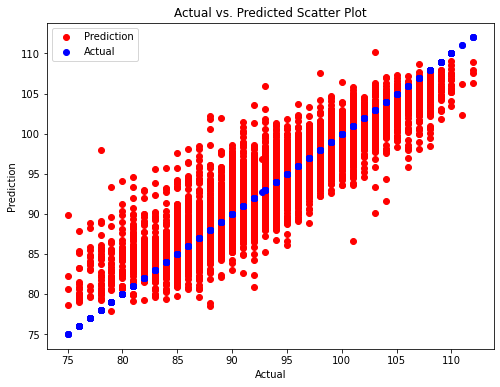

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions["actual"], predictions["prediction"], color="red", label="Prediction")
plt.scatter(predictions["actual"], predictions["actual"], color="blue", label="Actual")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual vs. Predicted Scatter Plot")
plt.legend()
plt.show()